# Visualisasi CLTR Hyperspectral to RGB

Kode Skripsi Nathasya E (2021)

## Table of Contents
- [Preparation](#Preparation)
- [Normalization](#Normalization)
- [Interpolation](#Interpolation)
- [CLTR Transformation](#CLTR_Transformation)
- [Playground](#Playground)

## Concept

> hyperspectral img -> normalization (optional) -> interpolation -> CLTR transformation

Interpolation is needed to transform the image data to match color matching function data for CLTR transformation that has 1 nm interval. The main code and exploration of each steps will be elaborated in different section on table of contents. The example of visualization implementation with different settings can be seen in Playground section. 

# Preparation

In [7]:
import spectral as sp
from spectral import *
import numpy as np
import matplotlib.pyplot as plt
import argparse
from plantcv import plantcv as pcv
import cv2
import numpy as np
from glob import glob
from PIL import Image

In [9]:
hdr = sp.envi.open("blues_1_29_VNIR_1800_2029.hdr")
wvl = hdr.bands.centers
rows, cols, bands = hdr.nrows, hdr.ncols, hdr.nbands
meta = hdr.metadata

img = hdr.load()

# Normalization

In [11]:
im = img.copy()[:,:,:]

In [12]:
def normalize(im):
    xx = im.copy()
    xxmax, xxmin = xx.max(), xx.min()
    xx = (xx - xxmin)/(xxmax - xxmin)
    return xx

# Interpolation

In [17]:
'''
Populate a list of wavelength with certain interval.
'''

def populate_wvl(first_wvl, last_wvl, interval):
    new_wvl = [i for i in range(first_wvl,last_wvl,interval)]
    return new_wvl

In [18]:
'''
Interpolate and Plot
Interpolate list of x values (xvals) based on given data points (x and y)
'''

def interp_n_plot(x,y,xvals):
    yinterp = np.interp(xvals, x, y)
    plt.plot(x,y)
    plt.plot(xvals, yinterp, 'o')
    plt.show()
    return yinterp

## Exploration

In [16]:
# sample point

im[10, 60,]

array([0.26840553, 0.27368858, 0.2880443 , 0.3079493 , 0.32838392,
       0.34490922, 0.35596693, 0.36240083, 0.36526433, 0.36539757,
       0.36377656, 0.3606435 , 0.35563934, 0.34792447, 0.33666727,
       0.32217214, 0.30570504, 0.28842893, 0.2714201 , 0.25524876,
       0.2401294 , 0.22619313, 0.21304336, 0.19989999, 0.18663207,
       0.17352511, 0.1608214 , 0.14873862, 0.13743593, 0.12714288,
       0.1178754 , 0.10966302, 0.10287228, 0.09776185, 0.09416005,
       0.09175648, 0.090366  , 0.08984847, 0.09001024, 0.090796  ,
       0.09226225, 0.09441095, 0.0970171 , 0.09982571, 0.10269987,
       0.10558666, 0.10844775, 0.11128749, 0.11401632, 0.11655862,
       0.1190333 , 0.12140279, 0.12360499, 0.1256978 , 0.12772395,
       0.12970394, 0.13169587, 0.13378924, 0.13595672, 0.1380898 ,
       0.13997114, 0.14137623, 0.14238073, 0.14323656, 0.1441821 ,
       0.14526856, 0.14633803, 0.147267  , 0.1480446 , 0.1486906 ,
       0.149212  , 0.14977057, 0.15041   , 0.15101878, 0.15162

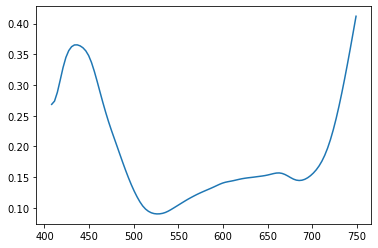

In [24]:
# plot original data points

visible_wvl = [ i for i in wvl if i <= 750 ] # visible_wvl : 408.047407 -  749.227321
point = im[10, 60,]
plt.plot(visible_wvl,point[:len(visible_wvl)])

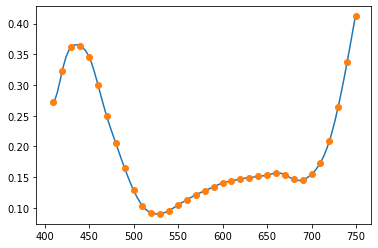

array([0.2716407 , 0.32324549, 0.36165912, 0.3637111 , 0.34615632,
       0.30063893, 0.24875622, 0.20560955, 0.16461003, 0.12881092,
       0.10304803, 0.09160311, 0.09020391, 0.09540818, 0.1041976 ,
       0.11307487, 0.12090797, 0.12757674, 0.13392692, 0.14025173,
       0.14355414, 0.14677655, 0.14900773, 0.15086318, 0.15319777,
       0.15645704, 0.15376106, 0.14610401, 0.14542013, 0.15460042,
       0.17348195, 0.20859602, 0.26466697, 0.33729347, 0.41205123])

In [25]:
# plot interpolation with interval 10 nm

new_wvl_10 = populate_wvl(410,760,10)
interp_n_plot(xvals = new_wvl_10, x = visible_wvl, y = point[:len(visible_wvl)])

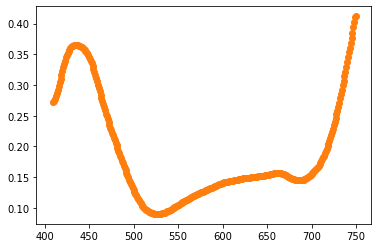

array([0.2716407 , 0.27329756, 0.27712825, 0.28163045, 0.28613266,
       0.29163626, 0.29787882, 0.30412137, 0.31042818, 0.31683683,
       0.32324549, 0.32941114, 0.33459376, 0.33977638, 0.34494253,
       0.34841042, 0.35187831, 0.3553462 , 0.35762355, 0.35964133,
       0.36165912, 0.36296876, 0.36386681, 0.36476485, 0.36528287,
       0.36532466, 0.36536645, 0.36526783, 0.36475945, 0.36425107,
       0.3637111 , 0.36272852, 0.36174594, 0.36076336, 0.35926554,
       0.35769615, 0.35612675, 0.35397126, 0.35155174, 0.34913223,
       0.34615632, 0.34262587, 0.33909541, 0.33524789, 0.33070197,
       0.32615604, 0.32153365, 0.31636928, 0.31120491, 0.30604054,
       0.30063893, 0.29522084, 0.28980275, 0.28444723, 0.27911296,
       0.27377869, 0.26859094, 0.26351932, 0.25844771, 0.25349791,
       0.24875622, 0.24401452, 0.23933985, 0.2349692 , 0.23059854,
       0.22622788, 0.22210192, 0.21797792, 0.21385393, 0.20973154,
       0.20560955, 0.20148756, 0.19734155, 0.19318049, 0.18901

In [29]:
# plot interpolation with interval 1nm

new_wvl_1 = populate_wvl(410,751,1)
interp_n_plot(visible_wvl, point[:len(visible_wvl)], new_wvl_1)

# CLTR_Transformation

File needed:
- cmf_data.npz (data of color matching function, contains list_illumination & CIE XYZ 1931)

In [31]:
# -*- coding: utf-8 -*-
"""
Created on Wed Oct  7 12:43:54 2020

@author: hildad
"""
import numpy as np


def refl_image_to_srgb(hyp, **kwargs):
    '''
    modified from ferdinand's
    note: set preloaded=False if an image matrix/array is passed directly instead of the object
    
    input assumed to be reflectance (not radiance) from 0-1.
    '''
    r, c = 0, 0
    illuminant = 'D65'
    scale = 1.0 if not kwargs.get('scale') else kwargs.get('scale')
    preloaded = kwargs.get('preloaded')
    wavelength = kwargs.get('wvl')
    if wavelength is None:
        wavelength = hyp.bands.centers
    if preloaded:
        r, c = hyp.shape[:2]
    else:
        r, c = hyp.nrows, hyp.ncols
        
    cie, band_index, norm_k = _calc_cmf_function(wavelength, illuminant)
    b1, b2 = band_index[0], band_index[-1]+1
    
    # Reflectance to xyz
    xyz_image = np.zeros((r, c, 3))
    for i in range(r):
#        if np.mod(i, 100) == 0:
#            print i, 'of', r
        line = None
        if preloaded:
            line = hyp[i, :, b1:b2].squeeze() / scale
        else:
            line = hyp.read_subregion(
                    (i, i+1), (0, c))[:, :, b1:b2].squeeze() / scale
        #image[i, :, :].squeeze() / scale
        line[line > 1] = 1 # Clipping
            
        # Apply CMF
        out_XYZ = np.zeros((c, 3), np.double)
        for j in range(3):
            out_XYZ[:, j] = np.trapz(line*cie[:, j+1], cie[:, 0])
        xyz_image[i, :, :] = (norm_k * out_XYZ) / 100.
    
    # xyz to srgb
    # Matrix
    M_srgb_from_xyz = np.array([
             [ 3.2404542, -1.5371385, -0.4985314],
             [-0.9692660,  1.8760108,  0.0415560],
             [ 0.0556434, -0.2040259,  1.0572252]])
    # Assertions and Reshaping
    assert xyz_image.shape[-1] == 3, 'Last dimension of xyz image must be 3'

    if xyz_image.ndim == 3:
        shape = xyz_image.shape
        xyz_image = np.reshape(xyz_image, [-1, 3])
    else :
        shape = 0
    # Applying the matrix
    srgb = np.dot(xyz_image, M_srgb_from_xyz.T)
    # Gamma correction
    gamma_map = (srgb >  0.0031308)
    srgb[gamma_map]   = 1.055 * np.power(srgb[gamma_map], (1. / 2.4)) - 0.055
    srgb[~gamma_map] *= 12.92
    # Scale to output rounding + clipping
    srgb *= 255
    srgb[srgb < 0] = 0
    srgb[srgb > 255] = 255
    srgb = srgb.round()
    srgb = srgb.astype(np.uint8)
    # Reshaping back
    if shape is not None:
        srgb = np.reshape(srgb, shape)
        
    if kwargs.get('return_xyz'):
        return srgb, xyz_image
    else:
        return srgb    
    
def _calc_cmf_range(illumination_range, cmf_range):
    '''
    Modified from Ferdinand's
    Calculate overlaping range range between CMF and illumination
    '''
    min_val = max(illumination_range.min(), cmf_range.min())
    max_val = min(illumination_range.max(), cmf_range.max())
    return np.arange(min_val, max_val+1), (min_val, max_val)


def _calc_cmf_function(imgbands, illumination='D65'):
    '''
    Modified from Ferdinand's
    
    Calculates a CMF, based on global `_CIE_XYZ_1931`, multiplied with the 
    given `illumination` - the values are clipped to the range of `imgbands` 
    limits and interpolated to `imgbands` values 

    Parameters:
        imgbands(numpy.array):
            List of the image bands - the CMF will be truncated between the min
            and max

        illumination(numpy.array/string): 
            np.array: SPD of the illumination -> bands must fit _illumination_list['Wavelength']
            string: entry in the illuination database, call list_illuminations() for further details

    Returns:
        cmf(numpy.array):   
            <length(index_bands)x4>
            [:,0] equas bands == bands[index_bands]
            [:,1] values to calculate X (under specified illumination)
            [:,2] values to calculate Y (under specified illumination)
            [:,3] values to calculate Z (under specified illumination)

        index_bands(np.array): indices of bands, which lie within the CMF limits
    '''
    cmf_data = np.load('cmf_data.npz')
    illumination_list = cmf_data['list_illumination']
    cie_xyz_1931 = cmf_data['CIE_XYZ_1931']
    wvl_illum, wvl_cmf = illumination_list['Wavelength'], cie_xyz_1931['Wavelength']
    cmf_range, cmf_limits = _calc_cmf_range(wvl_illum, wvl_cmf)
    
    # Illumination handling
    if illumination is None:
        illumination = np.ones(len(wvl_illum))
    if isinstance(illumination, str):
        illumination = illumination_list[illumination]
    if isinstance(imgbands, list):
        imgbands = np.array(imgbands)
    
    # find limits and indices
    true_limits = (max(imgbands.min(), cmf_limits[0]), min(imgbands.max(), cmf_limits[1]))
    index_cie = np.where((wvl_cmf >= true_limits[0]) & (wvl_cmf <= true_limits[1]))[0]
    index_illumination = np.where((wvl_illum >= true_limits[0]) & (wvl_illum <= true_limits[1]))[0]
    index_imgbands = np.where((imgbands >= true_limits[0]) & (imgbands <= true_limits[1]))[0]
    imgbands = imgbands[index_imgbands]
    
    k = 100 / np.trapz(y=cie_xyz_1931['Y'][index_cie] * illumination[index_illumination], 
                       x=wvl_cmf[index_cie])
    #print "DEBUG k = %f" % k
    cie = np.zeros((len(imgbands), 4))
    cie[:, 0] = np.array(imgbands)        
    cie[:, 1] = np.interp(cie[:, 0], wvl_cmf[index_cie], 
       cie_xyz_1931['X'][index_cie] * illumination[index_illumination])
    cie[:, 2] = np.interp(cie[:, 0], wvl_cmf[index_cie], 
       cie_xyz_1931['Y'][index_cie] * illumination[index_illumination])
    cie[:, 3] = np.interp(cie[:, 0], wvl_cmf[index_cie], 
       cie_xyz_1931['Z'][index_cie] * illumination[index_illumination])

    return cie, index_imgbands, k

In [32]:
'''
CLTR transform and save image result
using function refl_image_to_srgb by Hilda Deborah (2016)

Parameters
----------
wvl : float array
    list of wavelength     
im : array
    hyperspectral image to be transformed to srgb
title : str, optional
    title of saved result image
        
Returns
-------
result_arr
    array of srgb images
'''

def to_srgb(wvl, im, title="srg_result"):
    result_arr = refl_image_to_srgb(im, wvl = wvl, preloaded=True, scale = 1.0)
    result_img = Image.fromarray(result_arr)
    result_img.save(title+".jpg")
    plt.imshow(result_img)

    return result_arr    

# Playground

## wvl 410 - 760 with 1 nm interval

In [34]:
# make new im based on wvl distance 1nm
new_im = np.empty((im.shape[0], im.shape[1], len(new_wvl_1)), dtype=object)

for x in range(im.shape[0]):
    for y in range(im.shape[1]):
        new_im[x][y] = np.interp(new_wvl_1,visible_wvl, im[x][y][:len(visible_wvl)])

array([[[208, 206, 218],
        [208, 209, 217],
        [216, 216, 229],
        ...,
        [228, 229, 248],
        [228, 228, 247],
        [231, 232, 250]],

       [[205, 204, 217],
        [207, 208, 218],
        [217, 217, 232],
        ...,
        [229, 230, 248],
        [230, 231, 250],
        [231, 234, 250]],

       [[209, 210, 226],
        [209, 210, 225],
        [217, 217, 232],
        ...,
        [229, 231, 249],
        [231, 234, 251],
        [233, 235, 251]],

       ...,

       [[229, 231, 249],
        [228, 230, 248],
        [225, 227, 245],
        ...,
        [234, 237, 252],
        [236, 239, 253],
        [236, 238, 252]],

       [[228, 230, 249],
        [228, 229, 248],
        [228, 230, 247],
        ...,
        [239, 241, 253],
        [239, 242, 253],
        [238, 241, 253]],

       [[229, 230, 248],
        [229, 231, 249],
        [231, 232, 250],
        ...,
        [237, 240, 253],
        [237, 239, 253],
        [237, 240, 253]]

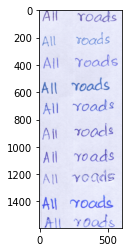

In [35]:
to_srgb(new_wvl_1, new_im, "410_760_1nm")

## wvl 410 - 760 nm with 1 nm interval and normalized img array

array([[[145, 144, 153],
        [145, 146, 152],
        [152, 151, 162],
        ...,
        [160, 161, 175],
        [160, 160, 175],
        [163, 163, 177]],

       [[143, 142, 152],
        [145, 145, 153],
        [152, 152, 163],
        ...,
        [161, 162, 176],
        [162, 163, 178],
        [163, 165, 179]],

       [[146, 147, 159],
        [146, 147, 158],
        [153, 152, 164],
        ...,
        [161, 163, 177],
        [163, 165, 179],
        [165, 166, 180]],

       ...,

       [[161, 163, 177],
        [160, 162, 176],
        [159, 160, 174],
        ...,
        [166, 167, 182],
        [167, 169, 184],
        [167, 167, 182]],

       [[161, 162, 177],
        [160, 161, 176],
        [161, 162, 175],
        ...,
        [169, 170, 184],
        [170, 171, 185],
        [169, 170, 185]],

       [[161, 162, 177],
        [161, 163, 177],
        [163, 163, 178],
        ...,
        [168, 169, 183],
        [168, 169, 183],
        [168, 169, 183]]

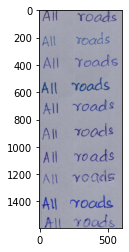

In [37]:
# make new im based on wvl distance 1nm NORMALIZED

normalized_img = normalize(im)

new_x_norm1 = np.empty((normalized_img.shape[0], normalized_img.shape[1], len(new_wvl_1)), dtype=object)

for x in range(normalized_img.shape[0]):
    for y in range(normalized_img.shape[1]):
        new_x_norm1[x][y] = np.interp(new_wvl_1,visible_wvl, normalized_img[x][y][:len(visible_wvl)])
        
to_srgb(new_wvl_1, new_x_norm1, "410_760_1nm_interpolated_normalized")

## wvl 408 - 700 nm with 4 nm interval

In [38]:
new_wvl_4 = [i for i in range(408,701,4)]
new_im2 = np.empty((im.shape[0], im.shape[1], len(new_wvl_4)), dtype=object)

In [39]:
for x in range(im.shape[0]):
    for y in range(im.shape[1]):
        new_im2[x][y] = np.interp(new_wvl_4, visible_wvl, im[x][y][:len(visible_wvl)])

array([[[208, 206, 218],
        [208, 209, 217],
        [216, 216, 230],
        ...,
        [228, 229, 248],
        [228, 228, 247],
        [231, 232, 250]],

       [[205, 204, 218],
        [207, 208, 218],
        [217, 217, 232],
        ...,
        [228, 230, 248],
        [229, 231, 250],
        [231, 234, 251]],

       [[209, 210, 226],
        [209, 210, 225],
        [217, 217, 233],
        ...,
        [228, 231, 249],
        [231, 234, 251],
        [233, 235, 251]],

       ...,

       [[229, 231, 249],
        [228, 230, 249],
        [225, 227, 246],
        ...,
        [234, 237, 252],
        [236, 239, 253],
        [236, 238, 252]],

       [[228, 230, 249],
        [227, 229, 249],
        [228, 230, 248],
        ...,
        [238, 241, 253],
        [239, 242, 253],
        [238, 241, 253]],

       [[229, 230, 249],
        [229, 231, 249],
        [231, 232, 250],
        ...,
        [237, 240, 253],
        [237, 239, 253],
        [237, 240, 253]]

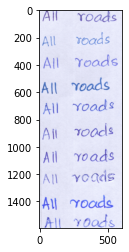

In [40]:
to_srgb(new_wvl_4, new_im2, "408_700_4nm_interpolated")